<a href="https://colab.research.google.com/github/kumar2612/ai_ml/blob/ai_ml_basics_nov2024/langgraph_tutorials/5_Langgraph_Q_A_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --quiet langchain-community langchainhub langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00


In [2]:
!pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1769 sha256=77b9334da3f2eb64528451fb517c0166c9d15ed9aef37a79adcd71ddf30a141c
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3874 sha256=24d0a47011d085947523693441d1b2393598abbce7516aad12e3052d354b4e3a
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31665 sha256=b93818ae1e84805090f722371d48c7d7c398959b013fa2f47707f9a2c5f8d790
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

In [3]:
!apt-get install sqlite3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 768 kB of archives.
After this operation, 1,873 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 sqlite3 amd64 3.37.2-2ubuntu0.3 [768 kB]
Fetched 768 kB in 1s (1,340 kB/s)
Selecting previously unselected package sqlite3.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../sqlite3_3.37.2-2ubuntu0.3_amd64.deb ...
Unpacking sqlite3 (3.37.2-2ubuntu0.3) ...
Setting up sqlite3 (3.37.2-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [4]:
!curl -s https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql | sqlite3 Chinook.db

In [5]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///Chinook.db")
print(db.dialect)
print(db.get_usable_table_names())
db.run("SELECT * FROM Artist LIMIT 10;")

sqlite
['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


"[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains'), (6, 'Antônio Carlos Jobim'), (7, 'Apocalyptica'), (8, 'Audioslave'), (9, 'BackBeat'), (10, 'Billy Cobham')]"

In [7]:
from typing_extensions import TypedDict


class State(TypedDict):
    question: str
    query: str
    result: str
    answer: str

In [8]:
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 6.4 MB/s eta 0:00:00


In [9]:
from google.colab import userdata
import os

os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_ENDPOINT"]="https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"]=userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_PROJECT"]="langchain_tutorials"

os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.3-70b-versatile")

In [10]:
from langchain import hub

query_prompt_template = hub.pull("langchain-ai/sql-query-system-prompt")

assert len(query_prompt_template.messages) == 1
query_prompt_template.messages[0].pretty_print()

================================ System Message ================================

Given an input question, create a syntactically correct {dialect} query to run to help find the answer. Unless the user specifies in his question a specific number of examples they wish to obtain, always limit your query to at most {top_k} results. You can order the results by a relevant column to return the most interesting examples in the database.

Never query for all the columns from a specific table, only ask for a the few relevant columns given the question.

Pay attention to use only the column names that you can see in the schema description. Be careful to not query for columns that do not exist. Also, pay attention to which column is in which table.

Only use the following tables:
{table_info}

Question: {input}


In [11]:
from typing_extensions import Annotated


class QueryOutput(TypedDict):
    """Generated SQL query."""

    query: Annotated[str, ..., "Syntactically valid SQL query."]


def write_query(state: State):
    """Generate SQL query to fetch information."""
    prompt = query_prompt_template.invoke(
        {
            "dialect": db.dialect,
            "top_k": 10,
            "table_info": db.get_table_info(),
            "input": state["question"],
        }
    )
    structured_llm = llm.with_structured_output(QueryOutput)
    result = structured_llm.invoke(prompt)
    return {"query": result["query"]}

In [12]:
write_query({"question": "How many Employees are there?"})

{'query': 'SELECT COUNT(EmployeeId) FROM Employee LIMIT 10'}

In [13]:
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool


def execute_query(state: State):
    """Execute SQL query."""
    execute_query_tool = QuerySQLDatabaseTool(db=db)
    return {"result": execute_query_tool.invoke(state["query"])}

In [14]:
execute_query({"query": "SELECT COUNT(EmployeeId) AS EmployeeCount FROM Employee;"})

{'result': '[(8,)]'}

In [15]:
def generate_answer(state: State):
    """Answer question using retrieved information as context."""
    prompt = (
        "Given the following user question, corresponding SQL query, "
        "and SQL result, answer the user question.\n\n"
        f'Question: {state["question"]}\n'
        f'SQL Query: {state["query"]}\n'
        f'SQL Result: {state["result"]}'
    )
    response = llm.invoke(prompt)
    return {"answer": response.content}

In [16]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence(
    [write_query, execute_query, generate_answer]
)
graph_builder.add_edge(START, "write_query")
graph = graph_builder.compile()

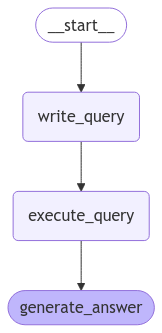

In [17]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
for step in graph.stream(
    {"question": "How many employees are there?"}, stream_mode="updates"
):
    print(step)

{'write_query': {'query': 'SELECT COUNT(EmployeeId) FROM Employee LIMIT 10'}}
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': 'The SQL query is using a LIMIT clause, which restricts the number of rows returned. However, the COUNT() function is an aggregate function that returns a single value, so the LIMIT clause does not affect the result in this case.\n\nAccording to the SQL result, there are 8 employees.'}}


In [19]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory, interrupt_before=["execute_query"])

# Now that we're using persistence, we need to specify a thread ID
# so that we can continue the run after review.
config = {"configurable": {"thread_id": "1"}}

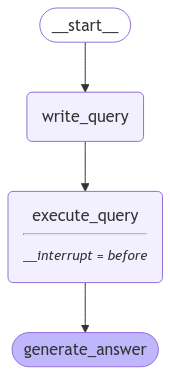

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
for step in graph.stream(
    {"question": "How many employees are there?"},
    config,
    stream_mode="updates",
):
    print(step)

try:
    user_approval = input("Do you want to go to execute query? (yes/no): ")
except Exception:
    user_approval = "no"

if user_approval.lower() == "yes":
    # If approved, continue the graph execution
    for step in graph.stream(None, config, stream_mode="updates"):
        print(step)
else:
    print("Operation cancelled by user.")

{'write_query': {'query': 'SELECT COUNT(EmployeeId) FROM Employee LIMIT 10'}}
{'__interrupt__': ()}
Do you want to go to execute query? (yes/no): yes
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': "The SQL query is using a LIMIT clause, which restricts the number of rows returned. However, the COUNT() function is an aggregate function that returns the total count of rows, regardless of the LIMIT clause. \n\nIn this case, the result [(8,)] indicates that there are 8 employees in total. The LIMIT 10 clause does not affect the count, it would only affect the number of rows returned if the query was selecting individual rows instead of counting them.\n\nSo, to answer the user's question: There are 8 employees."}}


In [21]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm)

tools = toolkit.get_tools()

tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7db6adc0c370>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7db6adc0c370>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7db6adc0c370>),
 QuerySQLCheckerTool(description='Use this tool to double check

In [22]:
from langchain import hub

prompt_template = hub.pull("langchain-ai/sql-agent-system-prompt")

assert len(prompt_template.messages) == 1
prompt_template.messages[0].pretty_print()

================================ System Message ================================

You are an agent designed to interact with a SQL database.
Given an input question, create a syntactically correct {dialect} query to run, then look at the results of the query and return the answer.
Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most {top_k} results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.
You have access to tools for interacting with the database.
Only use the below tools. Only use the information returned by the below tools to construct your final answer.
You MUST double check your query before executing it. If you get an error while executing a query, rewrite the query and try again.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to th

In [23]:
system_message = prompt_template.format(dialect="SQLite", top_k=5)

In [24]:
from langchain_core.messages import HumanMessage
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, tools, state_modifier=system_message)

In [25]:
question = "Which country's customers spent the most?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Which country's customers spent the most?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_7h6d)
 Call ID: call_7h6d
  Args:
  sql_db_schema (call_jxw3)
 Call ID: call_jxw3
  Args:
    table_names: customers, orders, products
  sql_db_query_checker (call_7vqh)
 Call ID: call_7vqh
  Args:
    query: SELECT country, SUM(total_amount) as total_spent FROM orders GROUP BY country ORDER BY total_spent DESC LIMIT 5;
  sql_db_query (call_j4ct)
 Call ID: call_j4ct
  Args:
    query: SELECT country, SUM(total_amount) as total_spent FROM orders GROUP BY country ORDER BY total_spent DESC LIMIT 5;
================================= Tool Message =================================
Name: sql_db_query

Error: (sqlite3.OperationalError) no such table: orders
[SQL: SELECT country, SUM(total_amount) as total_spent FROM orders GROUP BY country ORDER BY total

In [26]:
question = "Describe the playlisttrack table"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Describe the playlisttrack table
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_kp4e)
 Call ID: call_kp4e
  Args:
    tool_input: 
  sql_db_schema (call_925x)
 Call ID: call_925x
  Args:
    table_names: playlisttrack
================================= Tool Message =================================
Name: sql_db_schema

Error: table_names {'playlisttrack'} not found in database
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_w110)
 Call ID: call_w110
  Args:
    table_names: PlaylistTrack
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "PlaylistTrack" (
	"PlaylistId" INTEGER NOT NULL, 
	"TrackId" INTEGER NOT NULL, 
	PRIMARY KEY ("PlaylistId", "TrackId"), 
	FOREIGN KEY("TrackId") REFERENCES "Track" ("Tra

In [47]:
question = "Return the contents of the Customer table in a csv format"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Return the contents of the Customer table in a csv format
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_mge4)
 Call ID: call_mge4
  Args:
    tool_input: 
  sql_db_schema (call_a11b)
 Call ID: call_a11b
  Args:
    table_names: Customer
  sql_db_query_checker (call_fv7b)
 Call ID: call_fv7b
  Args:
    query: SELECT * FROM Customer LIMIT 5;
  sql_db_query (call_6p2w)
 Call ID: call_6p2w
  Args:
    query: SELECT * FROM Customer LIMIT 5;
================================= Tool Message =================================
Name: sql_db_query

[(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3), (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttga

In [48]:
import ast
import re


def query_as_list(db, query):
    res = db.run(query)
    res = [el for sub in ast.literal_eval(res) for el in sub if el]
    res = [re.sub(r"\b\d+\b", "", string).strip() for string in res]
    return list(set(res))


artists = query_as_list(db, "SELECT Name FROM Artist")
albums = query_as_list(db, "SELECT Title FROM Album")
albums[:5]

['Pop',
 'Wagner: Favourite Overtures',
 'Ace Of Spades',
 'My Way: The Best Of Frank Sinatra [Disc ]',
 'Great Recordings of the Century - Mahler: Das Lied von der Erde']

In [31]:
!pip install -qU langchain-huggingface

In [49]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

In [33]:
!pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.2 MB/s eta 0:00:

In [50]:
from langchain_chroma import Chroma

vector_store = Chroma(embedding_function=embeddings)

In [51]:
from langchain.agents.agent_toolkits import create_retriever_tool

_ = vector_store.add_texts(artists + albums)
retriever = vector_store.as_retriever(search_kwargs={"k": 5})
description = (
    "Use to look up values to filter on. Input is an approximate spelling "
    "of the proper noun, output is valid proper nouns. Use the noun most "
    "similar to the search."
)
retriever_tool = create_retriever_tool(
    retriever,
    name="search_proper_nouns",
    description=description,
)

In [52]:
print(retriever_tool.invoke("Alice Chains"))

Alice In Chains

Alice In Chains

Alice In Chains

Iron Maiden

Iron Maiden


In [57]:
# Add to system message
suffix = (
    "If you need to filter on a proper noun like a Name, you must ALWAYS first look up "
    "the filter value using the 'search_proper_nouns' tool! Do not try to "
    "guess at the proper name - use this function to find similar ones."
)

system = f"{system_message}\n\n{suffix}"

tools.append(retriever_tool)

#llm = ChatGroq(model="llama-3.3-70b-versatile") # not working
llm = ChatGroq(model="llama3-70b-8192")

agent = create_react_agent(llm, tools, state_modifier=system)

In [58]:
question = "How many albums does alis in chain have?"

for step in agent.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many albums does alis in chain have?
================================== Ai Message ==================================
Tool Calls:
  search_proper_nouns (call_gw2c)
 Call ID: call_gw2c
  Args:
    query: alis in chain
================================= Tool Message =================================
Name: search_proper_nouns

Aisha Duo

Aisha Duo

Aisha Duo

Warner  Anos

Warner  Anos
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_7cc9)
 Call ID: call_7cc9
  Args:
    tool_input:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_wkvd)
 Call ID: call_wkvd
  Arg